## 1

In [1]:
from __future__ import division
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

import random

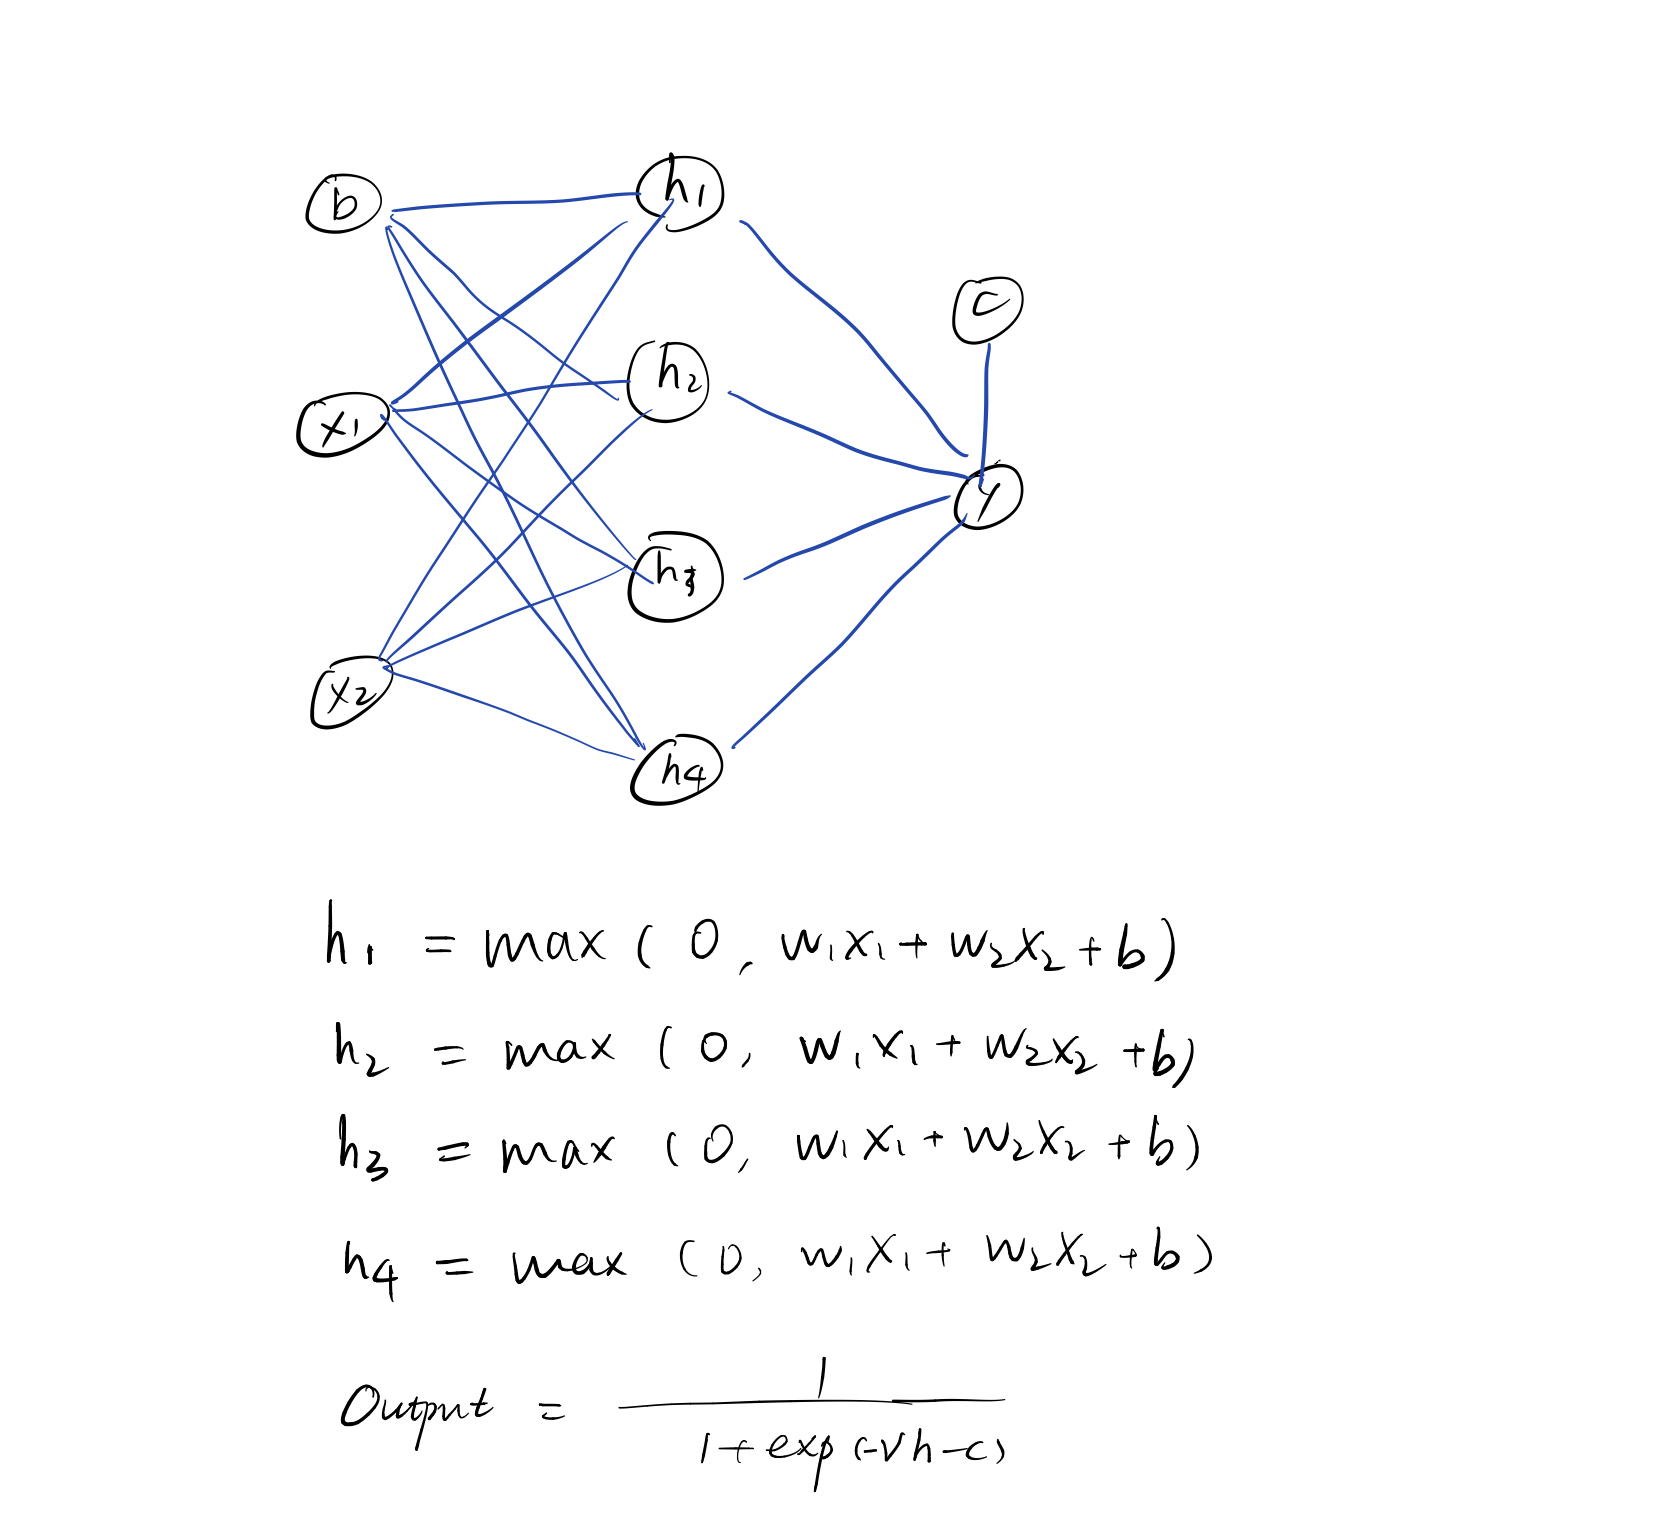

In [2]:
def relu(z):
    return np.maximum(0, z)

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.array(z)))

In [4]:
def ff_nn_ReLu(X, W, b, V, c):

    res = relu(np.array(X)@np.array(W)+b)
    return sigmoid(np.dot(res,np.array(V))+c)

In [5]:
X = [[1, -1], [0, -1], [0, 1]]
W = [[1, -1, 0, 1], [0, 0, 0.5, 1]]
b = [0, 0, 1, 0]
V = [1, 0, -1, 1]
c = 1

ff_nn_ReLu(X,W,b,V,c)

array([0.81757448, 0.62245933, 0.62245933])

## 2 Gradient Descent

### 2.1

$$
f_x(x,y)=-3x^2 - 100(2y^2-x)
$$

$$
f_y(x,y)=400y \cdot(2y^2-x)
$$

### 2.2

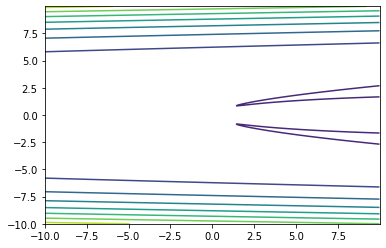

In [6]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = 3-X**3 +  50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### 2.3

In [7]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2-100*(2*y**2-x)
    df_dy = 400*y*(2*y**2-x)
    return np.array([df_dx, df_dy])

In [8]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):    
    if starting_point == None:
        x = 10
        y = 10
    else:
        x = starting_point[0]
        y = starting_point[1]
    trajs = [(x,y)]
    for i in range(iterations):
        g = grad_f((x,y))
        x = x-learning_rate*g[0]
        y = y-learning_rate*g[1]
        trajs.append([x,y])
    return np.array(trajs)

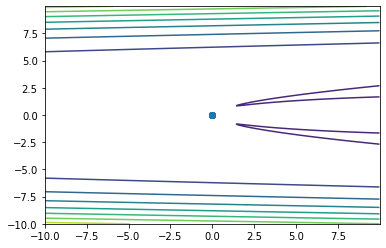

In [9]:
traj = grad_descent([0,0],iterations=10, learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

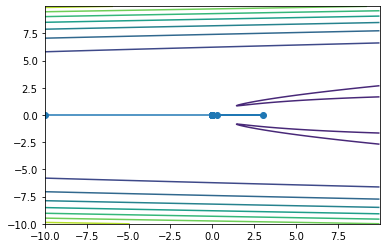

In [10]:
traj = grad_descent([-10,0],iterations=10, learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


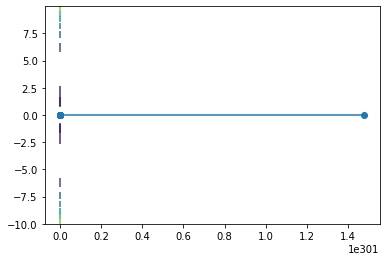

In [11]:
traj = grad_descent([5,0],iterations=10, learning_rate=0.1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 2.4

In [12]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point == None:
        x = 10
        y = 10
    else:
        x = starting_point[0]
        y = starting_point[1]
    v = np.zeros(np.shape(np.array([0,0])))
    trajs = [(x,y)]
    for _ in range(iterations):
        g = grad_f((x,y))
        v = alpha*v - epsilon*g
        x = x+v[0]
        y = y+v[1]
        trajs.append([x,y])
        
        
    return np.array(trajs)

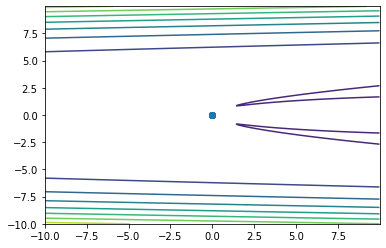

In [13]:
traj = grad_descent_with_momentum((0,0),iterations=10, epsilon=0.2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

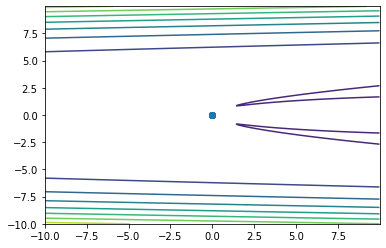

In [14]:
traj = grad_descent_with_momentum((0,0),iterations=10, epsilon=0.02, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

traj = grad_descent_with_momentum((1,0),iterations=10, epsilon=0.02, alpha=.05)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 3

### 3.1

In [15]:
def grad_f(x, y, y_hat, w, b, v, c):
    loss_y_hat = (y/y_hat - (1-y)/(1-y_hat))
    h = relu(np.array(x)@np.array(w)+b)
    
    dw = x.T.dot(np.expand_dims((loss_y_hat * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
    db = (loss_y_hat* y_hat*(1-y_hat)).T.dot(np.where(h<=0,0,1))*v
    
    dv = (loss_y_hat* y_hat*(1-y_hat)).T.dot(h)
    dc = loss_y_hat.dot(y_hat*(1-y_hat))
    
    return np.array([dw,db,dv,dc])/len(y)

### 3.2

In [16]:
x = np.array([[1,-1], [0,-1], [0, 1]])
w = np.array([[1, -1, 0, 1], [0, 0, 0.5, 1]])
b = np.array([0, 0, 1, 0])
v = np.array([1, 0, -1, 1])
c = 1
y_pred = ff_nn_ReLu(x,w,b,v,c)

In [17]:
y_pred

array([0.81757448, 0.62245933, 0.62245933])

In [18]:
print(grad_f(x, np.array([1,1,1]),y_pred,w,b,v,c))

[array([[ 0.06080851,  0.        , -0.06080851,  0.06080851],
       [-0.06080851,  0.        ,  0.06080851, -0.06080851]])
 array([ 0.06080851,  0.        , -0.31250229,  0.12584689])
 array([0.06080851, 0.        , 0.28209803, 0.12584689])
 0.3125022871342158]


### 3.3

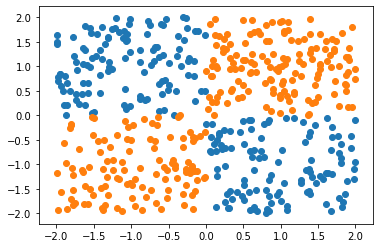

In [19]:
X = 4*np.random.rand(500,2)-2
y = np.zeros(500)
x0 = []
x1 = []
for i,x in enumerate(X):
    if x[0]*x[1] >= 0:
        y[i] = 1
        x1.append(x)
    else:
        x0.append(x)
x1 = np.array(x1)
x0 = np.array(x0)
plt.scatter(x0[:,0],x0[:,1])
plt.scatter(x1[:,0],x1[:,1])
plt.show()

### 3.4

In [20]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def grad_descent(x, y_true, w, b, v, c, iterations=10, learning_rate=0.1):  
    y_pred = ff_nn_ReLu(x,w,b,v,c)
    losses = [loss(y_true, y_pred)]
    for i in range(iterations):
        dw,db,dv,dc = grad_f(x, y_true, y_pred, w, b, v, c)
        w = w+learning_rate*dw
        b = b+learning_rate*db
        v = v+learning_rate*dv
        c = c+learning_rate*dc
        y_pred = ff_nn_ReLu(x,w,b,v,c)
        l = loss(y_true, y_pred)
        losses.append(l)
    return np.array([w,b,v,c]),losses

In [21]:
array, losses = grad_descent(X, y, w, b,v,c)

In [22]:
losses

[378.14330362783346,
 367.15562449193305,
 357.2134340285445,
 348.2946897045873,
 340.26593960733743,
 333.08871166152517,
 326.72362938881133,
 321.07449748141573,
 316.1437635540178,
 311.84293944835383,
 308.0909818015152]

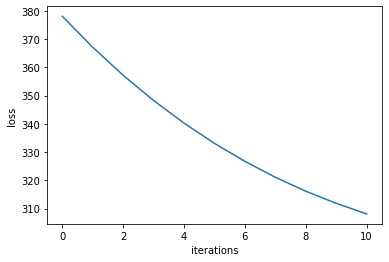

In [23]:
plt.plot(losses)
plt.ylabel("loss")
plt.xlabel("iterations")
plt.show()

### 3.5

In [24]:
def grad_descent_w_momentum(x, y_true, w, b, v, c, iterations=10, alpha=.1, epsilon=0.5):  
    y_pred = ff_nn_ReLu(x,w,b,v,c)
    losses = [loss(y_true, y_pred)]
    vw = np.zeros(w.shape)
    vb = np.zeros(b.shape)
    vv = np.zeros(v.shape)
    vc = 0
    for _ in range(iterations):
        dw,db,dv,dc = grad_f(x, y_true, y_pred, w, b, v, c)
        vw = alpha*vw - epsilon*dw
        vb = alpha*vb - epsilon*db
        vv = alpha*vv - epsilon*dv
        vc = alpha*vc - epsilon*dc
        w = w-vw
        b = b-vb
        v = v-vv
        c = c-vc
        y_pred = ff_nn_ReLu(x,w,b,v,c)
        l = loss(y_true, y_pred)
        losses.append(l)
    return np.array([w,b,v,c]),losses

In [28]:
array_m, losses_m =  grad_descent_w_momentum(X, y, w,b,v,c)

In [29]:
losses_m

[378.14330362783346,
 329.6807083216827,
 302.3109626237823,
 291.0933976519767,
 286.5820614870856,
 284.34138187253086,
 283.0370800089799,
 282.11281958700755,
 281.35668206943046,
 280.6975802590299,
 280.10282878251655]

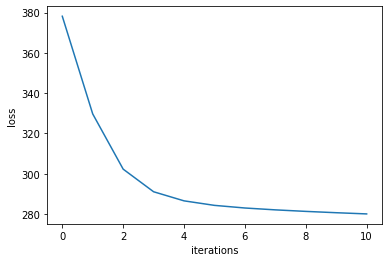

In [30]:
plt.plot(losses_m)
plt.ylabel("loss")
plt.xlabel("iterations")
plt.show()

### 3.6

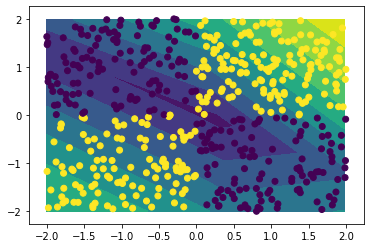

In [37]:
x1 = np.arange(-2.0, 2.0, 0.02)
x2 = np.arange(-2.0, 2.0, 0.02)
X1, X2 = np.meshgrid(x1, x2)
predict = ff_nn_ReLu(np.array((X1.ravel(),X2.ravel())).T, 
                     array_m[0],array_m[1],array_m[2],array_m[3]).reshape((200, 200))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, predict)
plt.scatter(X[:,0],X[:,1],c=y)